<a href="https://colab.research.google.com/github/marcielbp/aprendizagem-automatica-2021-1/blob/main/CKP8277_Apr_Aut_2021_1_LS01_Q01_507581_Marciel_Barros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enunciado Questão 01
Considere o conjunto de dados disponível em `articial1d.csv` organizado em duas colunas, $x$ e $y$. Seja um modelo de regressão linear para $\hat{y}=f(x) $.
1.   Apresente os parâmetros do modelo e o **MSE** (erro quadrático médio) obtidos pelo algoritmo **OLS** (mínimos quadrados ordinários). Plote a reta resultante sobre os dados.
2.   Apresente os parâmetros do modelo, o **MSE** e a curva de aprendizagem obtidos pelo algoritmo **GD** (gradiente descendente). Plote a reta resultante sobre os dados.
3. Apresente os parâmetros do modelo, o **MSE** e a curva de aprendizagem obtidos pelo algoritmo **SGD** (gradiente descendente estocástico). Plote a reta resultante sobre os dados.

OBS: Permitido usar bibliotecas `numpy`, `pandas` e `matplotlib` ou `seaborn`

In [1]:
## Importação de Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/marcielbp/aprendizagem-automatica-2021-1/main/LS01/datasets/artificial1d.csv')

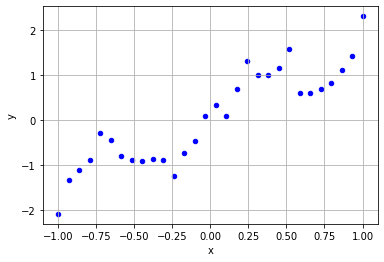

In [3]:
# Vamos avaliar a condição inicial dos dados via gráfico de scatter
df.plot.scatter(x='x', y='y', c='blue',grid=True) 

## Algoritmo OLS
Seja $\mathbf{X}$ a matriz formada pela concatenação de um vetor de $1s$ com o vetor de entradas $\mathbf{x}$, seja $\mathbf{y}$ o vetor de saídas obtidas no processo de experimentação e seja $\mathbf{w}$ o vetor formado pelos pesos de regressão linear tal que $\mathbf{w} = [w_0, w_1]$, o modelo de regressão linear pode ser reescrito por:

$\hat{\mathbf{y}} = \mathbf{X}\mathbf{w}$

Uma vez que $\mathbf{X}$ é uma matriz de dimensão $(n,2)$, considerando um modelo de regressão linear simples (ordem 1), ou seja, $\mathbf{X}$ não possui inversa. Porém, assumindo que a pseudoinversa à esquerda da $\mathbf{X}$ é escrita como $\mathbf{X}^+$ portanto  $\mathbf{X}^+\mathbf{\hat{y}}= (\mathbf{X}^+ \mathbf{X})\mathbf{w}$, assim:

$\mathbf{w} = \mathbf{X}^+\mathbf{\hat{y}}$

Por sua vez, a pseudoinversa à esquerda $\mathbf{X}^+$ é dada por 

$\mathbf{X}^+ = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^{T}$

Portanto, o vetor de pesos ótimo será dado por:

$\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}$

In [4]:
# A partir do DataFrame, separamos os vetores x e y e montamos a matriz X inserindo uma coluna0 com valores iguais a um (peso w0)
x = df['x'].values
y = df['y'].values
y = y.reshape((len(y), 1))
Xt = np.vstack([np.ones(len(x)),x])
X = Xt.transpose()

In [84]:
# O cálculo dos pesos estimados é direto (Slide 27)
wols = np.linalg.inv(Xt.dot(X)).dot(Xt.dot(y)) ## Muita calma nessa hora

In [85]:
# Por sua vez, o Y estimado será calculado a partir dos valores originais de x aplicados à formula de regressão ye = Xw
ye = X.dot(wols)

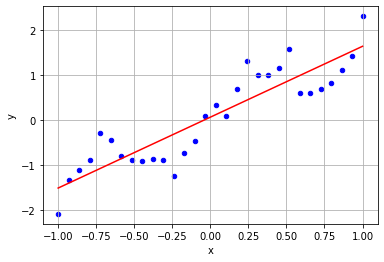

In [86]:
# Plotando a reta de regressão sobre a distribuição dos dados
df.plot.scatter(x='x', y='y', c='blue',grid=True) 
plt.plot(x,ye,c='red')

In [87]:
## Gradiente Descendente
wgd = np.array([0,0]).reshape((2, 1))
nEpoch = 10
alpha = 0.001
err = []
for i in range (0,50000):
  yeg = X.dot(wgd)
  errIt = y - yeg
  wgd = wgd + Xt.dot(errIt)*(1/len(x))*alpha
  err.append(np.mean(errIt*errIt))

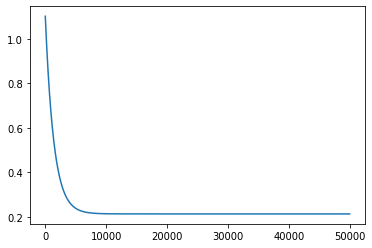

In [83]:
#MSE
plt.plot(err)

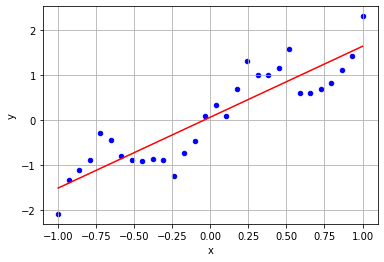

In [88]:
ygd = X.dot(wgd)
df.plot.scatter(x='x', y='y', c='blue',grid=True) 
plt.plot(x,ygd,c='red')